In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# loading data set 
path = "StudentPerformanceFactors.csv"

df= pd.read_csv(path)

In [79]:
# number of rows and columns in dataset
print(df.shape)

(6607, 20)


In [80]:
# checking dta types of each columns
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [81]:
# checking first 5 value in dataset using head method
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [82]:
# overal observation of data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [83]:
# detailed statistics 
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

<h1>Data Pre-processing </h1>

In [84]:
# missing value check
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [85]:
# checking duplicate entry
print(df.duplicated().sum())

0


In [86]:
# cleaning data if any duplicate value occure
df = df.drop_duplicates().reset_index(drop=True)

In [87]:
# checking unique value counts in data set
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [88]:
# convert category 
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique()<=20:
        df[col] = df[col].astype('category')

In [89]:
# filling missing values

# set two variable for handling numerical and categorical values

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['category']).columns

In [90]:
# handling numerical values
for col in num_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

In [91]:
# handling categorical values
for col in cat_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [92]:
# missing value check
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [93]:
# study efficancy (exam_score per study _hour)

# replace (0,np.nan) will handle  division by zero error  
df['study_efficiency'] = df['Exam_Score'] / df['Hours_Studied'].replace(0, np.nan)

# fill nan value with 0
df['study_efficiency'] = df['study_efficiency'].fillna(0)

In [94]:
#  attendance category 

def attendance_category(x):
    if x<70:
        return "Low"
    elif x<85:
        return "Medium"
    else:
        return "High"

df["attendance_category"] = df["Attendance"].apply(attendance_category).astype("category")

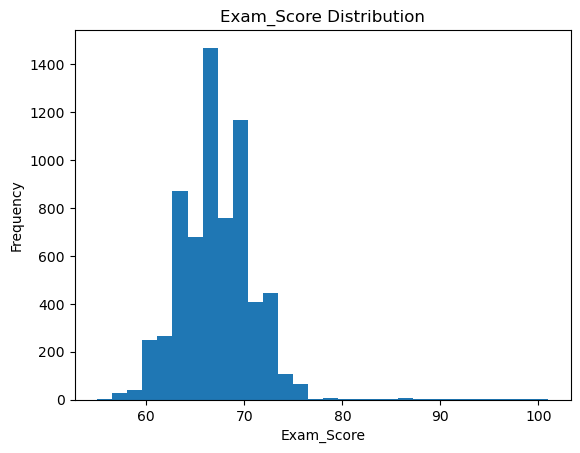

In [95]:
# uni variate analysis

plt.figure()
df['Exam_Score'].plot(kind='hist', bins=30, title='Exam_Score Distribution')
plt.xlabel('Exam_Score'); plt.ylabel('Frequency')
plt.show()

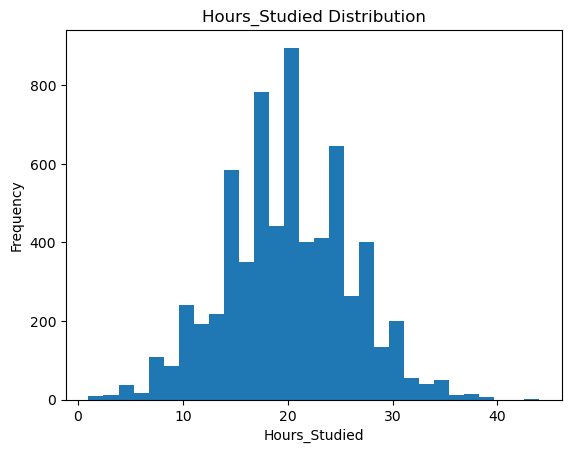

In [96]:
plt.figure()
df['Hours_Studied'].plot(kind='hist', bins=30, title='Hours_Studied Distribution')
plt.xlabel('Hours_Studied'); plt.ylabel('Frequency')
plt.show()

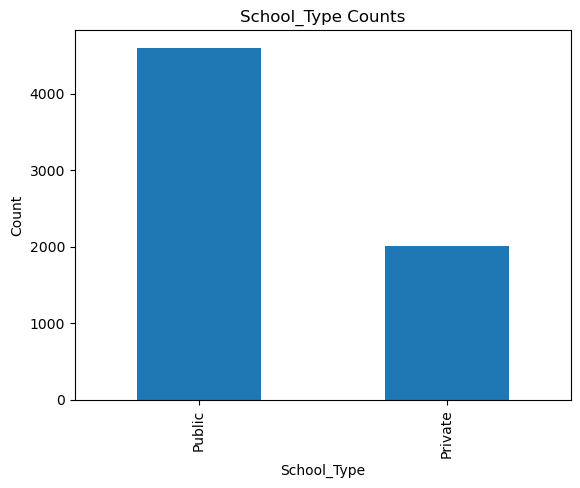

In [97]:
plt.figure()
df['School_Type'].value_counts().plot(kind='bar', title='School_Type Counts')
plt.xlabel('School_Type'); plt.ylabel('Count')
plt.show()

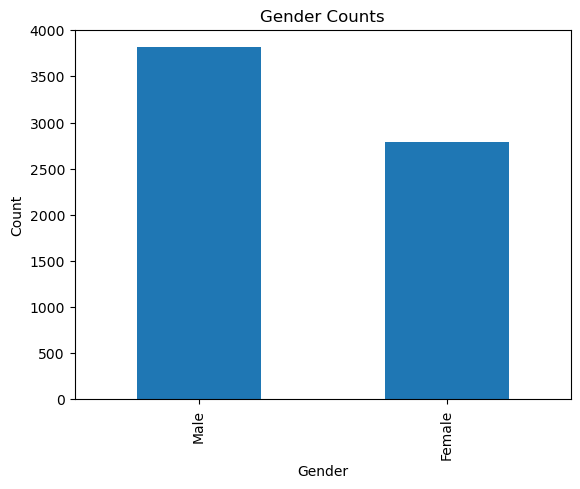

In [98]:
plt.figure()
df['Gender'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xlabel('Gender'); plt.ylabel('Count')
plt.show()

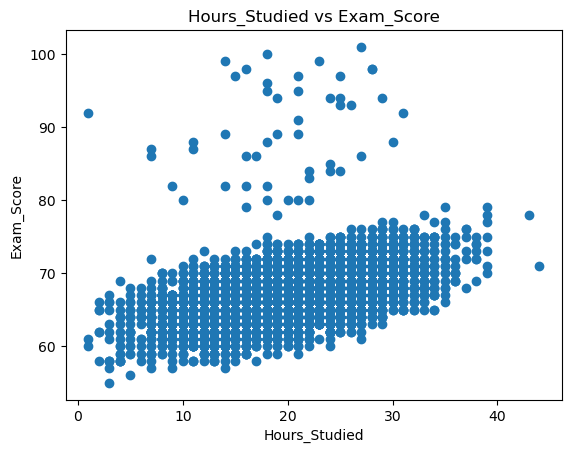

In [99]:
# Bivariate Analysis

plt.figure()
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Hours_Studied vs Exam_Score')
plt.xlabel('Hours_Studied'); plt.ylabel('Exam_Score')
plt.show()

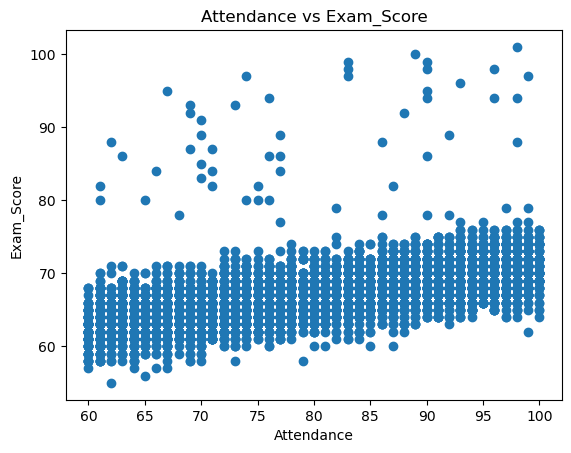

In [100]:
plt.figure()
plt.scatter(df['Attendance'], df['Exam_Score'])
plt.title('Attendance vs Exam_Score')
plt.xlabel('Attendance'); plt.ylabel('Exam_Score')
plt.show()

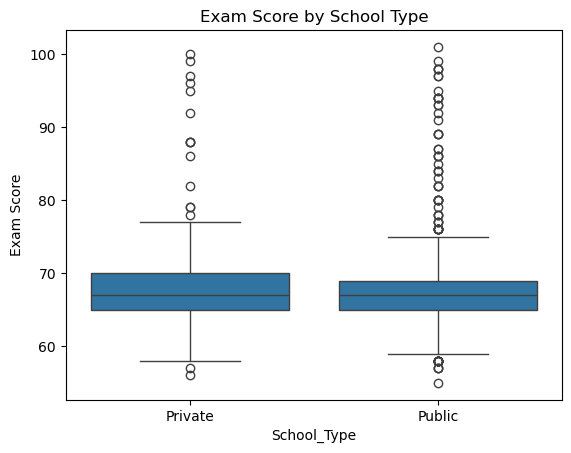

In [101]:
sns.boxplot(x="School_Type", y="Exam_Score", data=df)
plt.title("Exam Score by School Type")
plt.ylabel("Exam Score")
plt.show()

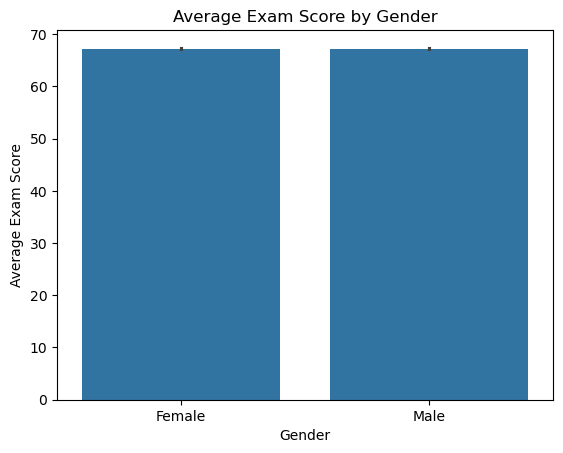

In [102]:
sns.barplot(x="Gender", y="Exam_Score", data=df, estimator=np.mean)
plt.title("Average Exam Score by Gender")
plt.ylabel("Average Exam Score")
plt.show()

In [103]:
# multi variate analysis

num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)


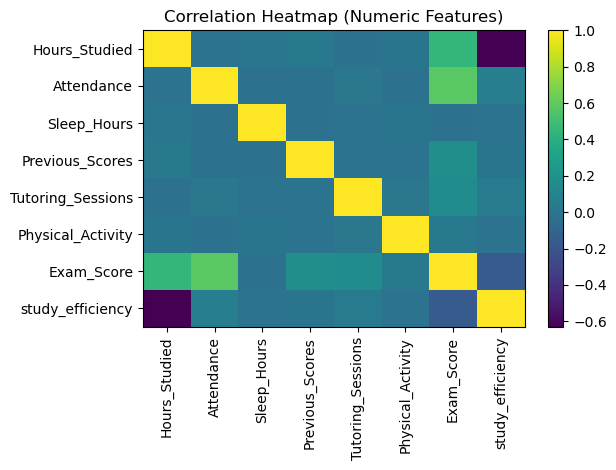

In [104]:
plt.figure()
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap (Numeric Features)')
plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10128\2518192584.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('attendance_category')['Exam_Score'].mean().reindex(['Low','Medium','High']).plot(


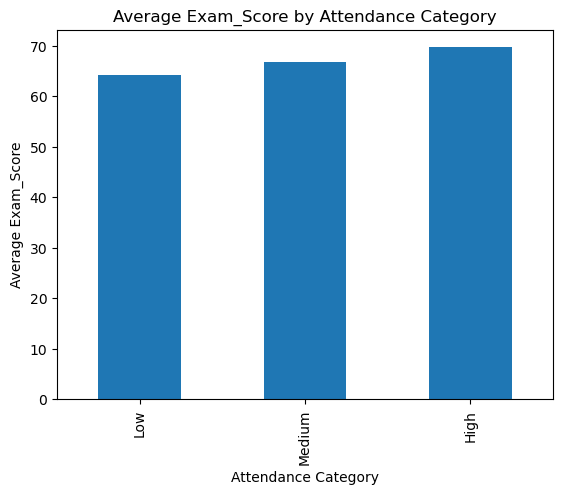

In [106]:
plt.figure()
df.groupby('attendance_category')['Exam_Score'].mean().reindex(['Low','Medium','High']).plot(
    kind='bar', title='Average Exam_Score by Attendance Category')
plt.xlabel('Attendance Category'); plt.ylabel('Average Exam_Score')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10128\2925272810.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Parental_Involvement')['Exam_Score'].mean().sort_values().plot(


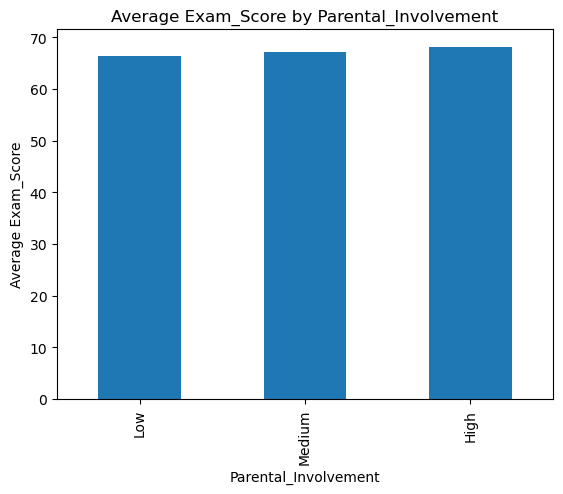

In [107]:
plt.figure()
df.groupby('Parental_Involvement')['Exam_Score'].mean().sort_values().plot(
    kind='bar', title='Average Exam_Score by Parental_Involvement')
plt.xlabel('Parental_Involvement'); plt.ylabel('Average Exam_Score')
plt.show()

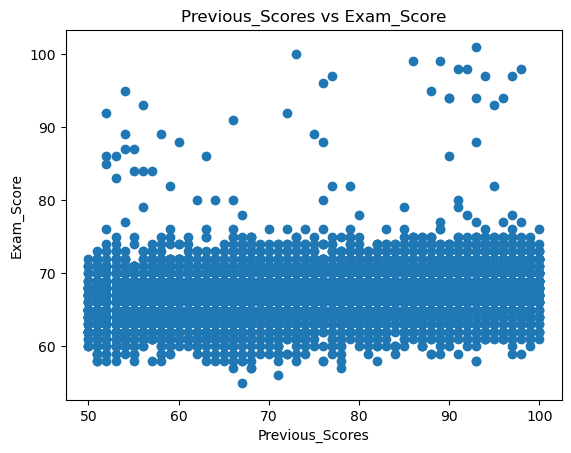

In [108]:
plt.figure()
plt.scatter(df['Previous_Scores'], df['Exam_Score'])
plt.title('Previous_Scores vs Exam_Score')
plt.xlabel('Previous_Scores'); plt.ylabel('Exam_Score')
plt.show()

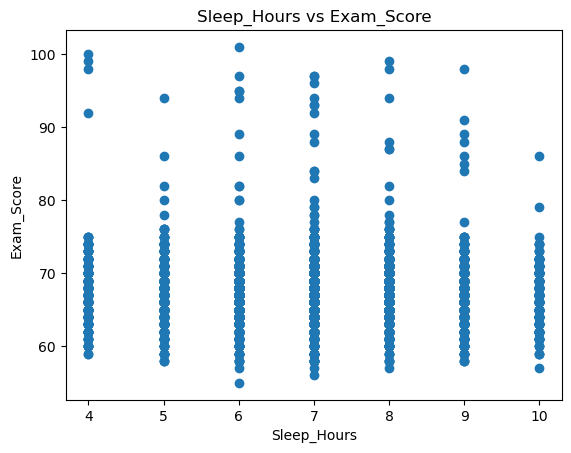

In [109]:
plt.figure()
plt.scatter(df['Sleep_Hours'], df['Exam_Score'])
plt.title('Sleep_Hours vs Exam_Score')
plt.xlabel('Sleep_Hours'); plt.ylabel('Exam_Score')
plt.show()

In [110]:
summary_tables = {
    'by_school_type': df.groupby('School_Type')['Exam_Score'].agg(['mean','median','count']).sort_values('mean', ascending=False),
    'by_gender': df.groupby('Gender')['Exam_Score'].agg(['mean','median','count']).sort_values('mean', ascending=False),
    'by_parental_involvement': df.groupby('Parental_Involvement')['Exam_Score'].agg(['mean','median','count']).sort_values('mean', ascending=False),
}

for name, table in summary_tables.items():
    print(f"\n=== {name} ===")
    display(table.head(10))



=== by_school_type ===


C:\Users\HP\AppData\Local\Temp\ipykernel_10128\1506948973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'by_school_type': df.groupby('School_Type')['Exam_Score'].agg(['mean','median','count']).sort_values('mean', ascending=False),
C:\Users\HP\AppData\Local\Temp\ipykernel_10128\1506948973.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'by_gender': df.groupby('Gender')['Exam_Score'].agg(['mean','median','count']).sort_values('mean', ascending=False),
C:\Users\HP\AppData\Local\Temp\ipykernel_10128\1506948973.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True i

,mean,median,count
School_Type,,,
Private,67.287705,67.0,2009
Public,67.212919,67.0,4598



=== by_gender ===


,mean,median,count
Gender,,,
Female,67.244898,67.0,2793
Male,67.228894,67.0,3814



=== by_parental_involvement ===


,mean,median,count
Parental_Involvement,,,
High,68.092767,68.0,1908
Medium,67.098156,67.0,3362
Low,66.358265,66.0,1337


In [111]:
top_corr = corr['Exam_Score'].sort_values(ascending=False)
print("\nTop correlations with Exam_Score:")
print(top_corr.head(10))


Top correlations with Exam_Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
study_efficiency    -0.164321
Name: Exam_Score, dtype: float64
